# Track 1: Introduction and Simple Self-propelled and Brownian Model

Today we are going to explore how we can use a [popular game engine](https://www.pygame.org/wiki/about) `pygame` for implementing agent-based simulation. Due to the limited time, a code base with the necessary functions and classes are already provided (this repo). 

First, we will install the package following the `README.md` and using `InstallAndTest.ipynb` in the same repo. (important terms during this phase: [virtual environments](https://www.freecodecamp.org/news/python-virtual-environments-explained-with-examples/), [python packages](https://www.educative.io/answers/what-are-python-packages), installation via [pip](https://realpython.com/what-is-pip/))

Afterwards, we will quickly go through how this code base is built and the main concepts necessary to understand it. (terms to discuss: python [classes](https://www.dataquest.io/blog/using-classes-in-python/), [inheritance](https://www.w3schools.com/python/python_inheritance.asp), [class attributes](https://www.educative.io/answers/what-is-a-python-class-attribute) and methods, pygame, simulation loop, visualization.)

## The code base

To help you start up quickly, we implemented the basics for the upcoming 2 days. In general you will not have to change this code, except for the __advanced optional excercises__. You still have to understand what is happening under the hood, to access data that simulations generate or control model parameters of a simulation from a jupyter notebook.

`pygame`: For our implementation we used pygame, a portable game engine optimized for parallelization. 
**Why?** pygame fulfills the following:
  - provides a way to real-time visualize simulations - __gain insight__
  - allows to interact with teh simulation - __experiment__
  - inherently object based - __agent-based simulations__
  - many built in features - __collisions, overlaps, etc.__
  - faster than "from skratch" implementation - __optimized for parallel computing and parts of the code are not running in python__
  
`classes`: If you are not familiar with classes, you can read more about them under these sources: .... Classes are great because they control what is accessible and what is not from other parts of the code. They implement logical units. __Methods__ and __attributes__ necessary for that functional unit will be the part of the class. Classes can __inherit__ from each other. A __child__ is always carrying all functionalities of a __parent__ but we can give them new functionalities by __overriding__ class methods and attributes. 
**What does this mean in practice?** In practice this means that we can create "borrow" functionalities from already created classes in plug-and-play python packages. For instance we will use the `pygame.Sprite` class as a parent for all our simulated agents. This will give basic "superpowers" for our agents, such as optimized parallel computing, built in visualizations, etc. Then we will define our agents own functionalities.

**Question**: What functionalities would you give for an agent class that should implement random movement in an arena?

We can even go further and extend our moving agents with other dynamics, such as epydemiological models allowing agents to infect each other and have behavior according to their infection status. You will see an example about this tomorrow.

`simulation`: In this framework we define the simulation as a simple for loop of length `T` in which every agent (which we could see is just a class instance) will be __updated__ and __visualized__ according to their updated state (position, orientation). We also save these data into the memory so we can use later on. 

## Modelling random motion of Self-propelled particles

To showcase a first simple model, let's have a look together at the `AgentBrownianSelfPropelled` class. It is a child of `AgentBase` class implementing every general aspect of an agent, such as:
  - they have basic **behavioral attributes** for what and how they do, such as velocity and orientation in the environment, movement parameters, etc.
  - they have some **appearance**, such as being visualized with circle with a given radius and color
  - they have a **behavioral rule** implemented as an `update` method called in every simulation step.
  - they have a **visualization** method that updates that draws them on the screen according to their appearance
 
The `AgentBrownianSelfPropelled` class is very similar to it's parent but it's behavioral rule is different (__overridden__). It implements random movement with fixed self-propelled velocity `v_max` and with either __uniform__ or __normal__ distribution angular noise. The exact distribution of the noise can be controlled with `noise_type` and `noise_params` attributes of this new class.

We then create a `Simulation` class instance, that you can think of as a single run of simulation with a given set of parameters. It creates `N` agents, set's up an arena, and then simply runs a for loop in which agents are continously __updated__ and __visualized__.

Let's now se an example for this:

In [21]:
#first we install the package (in case it is not done yet)
# you only need to do this once
%pip install -e .

Obtaining file:///home/david/Desktop/PygameModelling23
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for PyGame-Modelling-Workshop-2023 (pyproject.toml) ... done
  Created wheel for PyGame-Modelling-Workshop-2023: filename=PyGame_Modelling_Workshop_2023-1.0.0-0.editable-py3-none-any.whl size=15324 sha256=a0841d0d8d67cb94f8172116effcb6029ee3fcdadc9934f618043778da733f9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-78ryz01l/wheels/bf/dc/4d/5ed31462d2c102b6e502355ac99d61c2591f63cfbb4efc1ac5
Successfully built PyGame-Modelling-Workshop-2023
  Attempting uninstall: PyGame-Modelling-Workshop-2023
    Found existing installation: PyGame-Modelling-Workshop-2023 1.0.0
    Uninstalling PyGame-Modelling-Workshop-2023-1.0.0:
      Successfully uninstalled PyGame-Modelling-Workshop-2023-1.0.0
Note: you may need to r

In [25]:
# Now we import the installaed package's Simulation class
from pygmodw23.sims import Simulation

########################
# Simulation Parameters#
########################
# simulation time in timesteps (ts)
T = 500

# number of agents
N = 500

# path trail lengths
memory_length = T

# arena size
width = height = 800
window_pad = 30


# Create a simulation instance
# we define the type of agents to be created with the agent_type attribute
simulation = Simulation(N=N, 
                        T=T, 
                        agent_type="brownian-selfpropelled", 
                        framerate=20,
                        width=width, 
                        height=height, 
                        window_pad=window_pad)

# Change some of the non-init attributes
# saved data length (and showed path length)
simulation.memory_length = memory_length
# save data turn on/off
simulation.save_agent_data = True
# showing colorcoded trails (only works if agent data is saved)
simulation.show_agent_trails = False



# Change Agent Parameters inside the simulation class
# We can reach all agents as a list in simulation.agents
for agent in simulation.agents:
    # movement parameters
    agent.noise_type = "uniform"           # or "normal"
    agent.noise_params = (-0.5, 0.5)       # (min, max) for uniform, (mean, std) for normal
    agent.v_max = 1                        # constant maximum absolute velocity in px/ts
    
    # start all agents from the middle of the arena
    agent.position = [window_pad + int(width/2), window_pad + int(height/2)]
    
    # some fancy color and size of agents
    agent.radius = 3
    agent.orig_color = (200, 200, 200)
    
    # set boundary conditions "bounce_back" (reflective walls) or "infinite" (torus)
    agent.boundary = "bounce_back"

# Turn off visualization if necessary (speeding up simulation significantly)
# simulation.with_visualization = False
# simulation.framerate = 2000


# Start the simulation loop
simulation.start()

Running simulation start method!
Starting main simulation loop!
2023-06-08_19-51-33.730020 Total simulation time:  25.072554


## Brownian non-selfpropelled particles
In case of particles that are not self propelled the velocity of the agents are driven purely by noise. We can use this model with the `brownian` agents when we create the simulation instance. In this case the noise on the orientation and velcoity of agents are both normal and can be controlled by the `noise_params_th` and `noise_params_v` parameters. Here is an example:

In [ ]:
# import numpy.pi
from numpy import pi
# Now we import the installaed package's Simulation class
from pygmodw23.sims import Simulation

########################
# Simulation Parameters#
########################
# simulation time in timesteps (ts)
T = 800

# number of agents
N = 1000

# path trail lengths
memory_length = T

# arena size
width = height = 800
window_pad = 30


# Create a simulation instance
simulation = Simulation(N=N, 
                        T=T, 
                        agent_type="brownian", 
                        framerate=20, 
                        width=width, 
                        height=height, 
                        window_pad=window_pad)

# Change some of the non-init attributes
# saved data length (and showed path length)
simulation.memory_length = memory_length
# save data turn on/off
simulation.save_agent_data = True
# showing colorcoded trails (only works if agent data is saved)
simulation.show_agent_trails = False

# Change Agent Parameters
for agent in simulation.agents:
    agent.noise_params_th = (0, 0.25*pi)   # (mean, std) normal
    agent.noise_params_v = (0, 2)      # (mean, std) normal
    agent.v_max = 0.5                  # constant maximum absolute velocity

    # start all agents from the middle of the arena
    agent.position = [window_pad + int(width/2), window_pad + int(height/2)]
    
    # some fancy color and size of agents
    agent.radius = 3
    agent.orig_color = (150, 150, 150)
    
    # set boundary conditions "bounce_back" (reflective walls) or "infinite" (torus)
    agent.boundary = "bounce_back"

# You can speed up up to 10x by turning off visualization with the following parameters:
# simulation.with_visualization = False
# simulation.show_agent_trails = False
# simulation.framerate = 2000
    

# Start the simulation
simulation.start()

Running simulation start method!
Starting main simulation loop!


## Saving modelling data as HDF5

Saving modelling data is essential to analyze the behavior of a model and to distribute the results. Keeping your data tranparent and your experiments reproducible means that you not only provide generated data, but you do so in a format that is widely accepted. [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) is a data format mostly used in sciences to store large amounts of data and to carry out analysis efficiently. 

In the following short demo we will save some resulting data of the `simulation` class instance. This data is currently saved in the memory after the simulation has been run and can be accessed as attributes of the `Simulation` class. As an example, we defined the `memory_length` variable in the previous block to be equal to the simulation time. After this, the trails of our particles has been shown. In the background the simulation class saves the orientation and position data (x, y) of each agent in an array and visualizes the paths from there. These can be accessed as `simulation.ori_memory` and `simulation.pos_memory`.

**Question:**  What do you think the shape of these arrays are going to be?

Now let's import [`h5py`](https://www.h5py.org/) that allows one to easily save and read numpy arrays to/from HDF5 files. We also import matplotlib for later visualization.

In [15]:
# Import h5py and save ori_memory to hdf5 file
import h5py

Let's save our arrays into a single file.

In [16]:
# Create a single H5 file to contain our arrays
h5f = h5py.File('agent_trails.h5', 'w')


# Save orientation and position memory (trails) into different datasets in the same file
h5f.create_dataset('orientation_memory', data=simulation.ori_memory)
h5f.create_dataset('position_memory', data=simulation.pos_memory)

<HDF5 dataset "position_memory": shape (1000, 2, 800), type "<f8">

In [17]:
# Close the file
h5f.close()

Let's check your project folder (in which this notebook is located). You should be able to see a new `agent_trails.h5` file. Now let's read back the data and visualize it.

In [18]:
# Read saved data from HDF5 file
h5f = h5py.File('agent_trails.h5','r')

# Read individual datasets into python variables
ori_memory_readback = h5f['orientation_memory'][:]
pos_memory_readback = h5f['position_memory'][:]

# close file after read
h5f.close()

# check if reading data was successful by printing array shapes 
print(f"Shape of readback orientation memory: {ori_memory_readback.shape}")
print(f"Shape of readback position memory: {pos_memory_readback.shape}")
# Was formatting with f-strings new for you? Check this out: https://realpython.com/python-f-strings/

Shape of readback orientation memory: (1000, 800)
Shape of readback position memory: (1000, 2, 800)


**Question:** Was your guess about the shape of these arrays correct or similar? Identify why exactly these are the shapes according to the parameters you have used to run the simulation.

## Visualizing saved data

Now let's visualize the data with the matplotlib package. Here is how the orientation changed of the 0th agent during the simulation:

Text(0.5, 1.0, 'Orientation of agent #0 in last 800 timesteps')

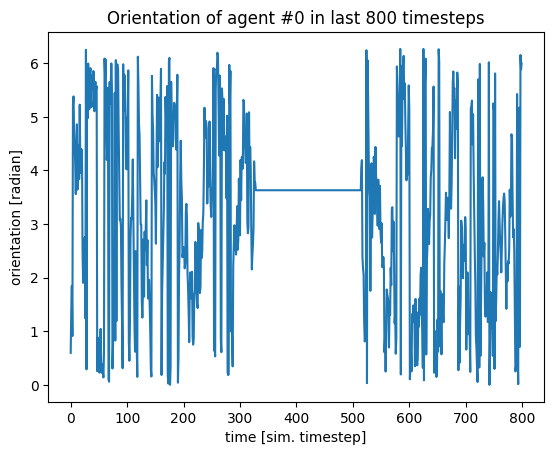

In [19]:
# Import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt
# Visualizing orientation of the 0th agent over the experiment
# Choosing agent ID
chose_agent = 0
# Plotting
plt.figure()
plt.plot([t for t in range(memory_length)], ori_memory_readback[chose_agent, :])
plt.xlabel("time [sim. timestep]")
plt.ylabel("orientation [radian]")
plt.title(f"Orientation of agent #{chose_agent} in last {memory_length} timesteps")

And here is the trajectory of the same agent recovered from position data:

Text(0.5, 1.0, 'Position of agent #6 over time')

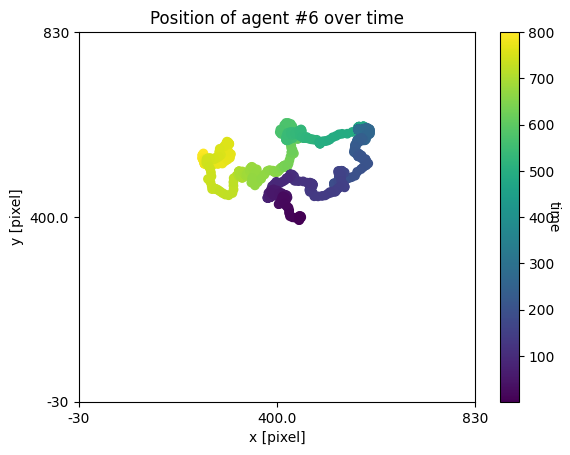

In [20]:
# Visualizing trajectory from position data of the 0th agent over the experiment
# Choosing agent ID
chose_agent = 6
# Plotting
plt.figure()
plt.scatter(pos_memory_readback[chose_agent, 0, :], pos_memory_readback[chose_agent, 1, :], c=[t for t in range(memory_length, 0, -1)])
plt.xlim(0, width + window_pad*2)
plt.ylim(0, height + window_pad*2)
plt.xticks([0, width/2 + window_pad, width + window_pad*2], [-window_pad, width/2, width+window_pad])
plt.yticks([0, height/2 + window_pad, height + window_pad*2], [-window_pad, height/2, height+window_pad])
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
# Creating colorbar to show temporal order of data points
cbar = plt.colorbar()
cbar.set_label('time', rotation=270)
plt.title(f"Position of agent #{chose_agent} over time")

## Excercises for Track 1.:
Here we will experiment with the qualitative effect of different noise parameters on the system. PLease provide your solution in this jupyter notebook. When finished send in the compiled notebook.

  - a.) Increase the stochasiticity on the system with **self-propelled** particles in the above code snippet by changing the minimum and maximum noise values in `agent.noise_params`. What can you say about the qualitative effects on the system? (disperison, coverage)
  - b.) Now change the noise type to `normal` with mean=0 and set the standard deviation to 0, 0.1, 0.25, 0.5, 1. Observe the effect of this kind of noise on the system. What do you think is different with this type of noise?
  - c.) Do a very short literature search and reason which type of noise would be more reasonable to model brownian motion of moving particles? why? How is the brownian model different from the self-propelled model?
  - d.) There are several arrays saved in memory in the `Simulation` class during runs.  These are `ori_memory` (orientation), `pos_memory` (position, x, y), `vx_memory` (velocity along x axis), `vy_memory` (velocity along y axis). Write a script in this notebook that saves all of these from a simulation instance to a single H5 file (similarly as what was presented with `ori_memory` and `pos_memory`).
  - e.) Usually we want to do parameter sweeps (changing parameters in a range gradually) for model simulations automatically. Write a script that changes the standard deviation of the normal noise on the self-propelled system according to the values in b.) but does this automatically in a loop and saves the resulting data in 5 different files named `autosweep_normal_S<standard deviation value without dots>.h5`. For example, `autosweep_normal_S0.h5` for 0 or `autosweep_normal_S025.h5` for 0.25.
  - f.) write a script that reads back the generated files, calculates the mean and standard deviation over time of the inter-timestep orientation difference (difference of orientation between step t and t+1 for all t). Take the mean values across all agents. Plot the resulting values with matplotlib and see if you get back the theoretical values. What might cause the differences you see?
  - g.) Assume an isolated box with reflective walls. Show the spatial distribution in x and y of 1000 particles according to the brownian model at t=0, t=500 and t=999. You can show the spatial distribution of particles by "counting" how many particles are in a given spatial unit. (Hint.: You can do this with numpy histograms). What can you conclude from the results? How does the spatial distribution change over time?

## Solutions for Excercises in Track 1